# London Crime by LSOA

Nama: Muhammad Danu Prasetia
</br>
Code: PYTN-KS16-020
</br>
Python for Data Science
</br>
<b>Asignment Python 1</b>

## Data Preparation

Pada bagian ini kita perlu mempersiapkan data untuk kita analisis yang mana pada analisis kali ini berisi mengenai Kriminalitas di Kota London, Inggris.

Pertama kita import terlebih dahulu Library yang diperlukan

In [2]:
#Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
import folium

Lalu membaca file dengan menginisiasi file pathnya terlebih dahulu

In [6]:
#Membaca file

path_file = 'C:/Users/danup/Hacktiv8Project/H8_5/Dataset/london_crime_by_lsoa.csv'
df = pd.read_csv(path_file)

Mengurutkan data berdasarkan tahun

In [7]:
#Mengurutkan data berdasarkan tahun
df.sort_values(by='year', ascending=True, axis=0, inplace=True)

Membuat variable df_1 untuk value yang bernilai lebih dari 1

In [8]:
#Membuat Variable df_1 untuk data yang bernilai lebih dari 1
df_1 = df[df["value"] >= 1]
df_1

lsoa_code                 borough               major_category  \
1315511   E01004204           Tower Hamlets  Violence Against the Person   
2874646   E01003986               Southwark                      Robbery   
8512166   E01000928                  Camden              Criminal Damage   
8512169   E01002676                Hounslow                        Drugs   
5807242   E01002999    Kingston upon Thames           Theft and Handling   
...             ...                     ...                          ...   
6171393   E01000439                  Bexley           Theft and Handling   
6171437   E01000108    Barking and Dagenham                     Burglary   
6171449   E01001915  Hammersmith and Fulham                        Drugs   
11948567  E01002406              Hillingdon           Theft and Handling   
6171475   E01001309                  Ealing           Theft and Handling   

                                  minor_category  value  year  month  
1315511                           Common Assault      2  2008      9  
2874646                        Business Property      1  2008      7  
8512166                    Other Criminal Damage      1  2008      9  
8512169                      Possession Of Drugs      2  2008      9  
5807242                              Other Theft      2  2008     11  
...                                          ...    ...   ...    ...  
6171393              Theft/Taking of Pedal Cycle      1  2016     12  
6171437                   Burglary in a Dwelling      3  2016      1  
6171449                      Possession Of Drugs      3  2016      5  
11948567  Motor Vehicle Interference & Tampering      5  2016     12  
6171475                              Other Theft      1  2016      5  

[3419099 rows x 7 columns]

Menampilkan 15 data teratas dan terbawah

In [11]:
df_1.head(15)

lsoa_code                 borough               major_category  \
1315511   E01004204           Tower Hamlets  Violence Against the Person   
2874646   E01003986               Southwark                      Robbery   
8512166   E01000928                  Camden              Criminal Damage   
8512169   E01002676                Hounslow                        Drugs   
5807242   E01002999    Kingston upon Thames           Theft and Handling   
8512202   E01001995                Haringey  Violence Against the Person   
1315554   E01001876  Hammersmith and Fulham              Criminal Damage   
2874608   E01002180                  Harrow                     Burglary   
5807318   E01004444          Waltham Forest           Theft and Handling   
8512129   E01003524                  Newham                     Burglary   
11363115  E01000403                  Bexley              Criminal Damage   
5807184   E01003051                 Lambeth                        Drugs   
2874696   E01003692               Redbridge  Violence Against the Person   
5807179   E01003091                 Lambeth              Criminal Damage   
5807177   E01004545              Wandsworth  Violence Against the Person   

                            minor_category  value  year  month  
1315511                     Common Assault      2  2008      9  
2874646                  Business Property      1  2008      7  
8512166              Other Criminal Damage      1  2008      9  
8512169                Possession Of Drugs      2  2008      9  
5807242                        Other Theft      2  2008     11  
8512202                         Harassment      1  2008      7  
1315554              Other Criminal Damage      1  2008      1  
2874608             Burglary in a Dwelling      1  2008      2  
5807318           Theft From Motor Vehicle      2  2008     12  
8512129             Burglary in a Dwelling      2  2008      5  
11363115  Criminal Damage To Motor Vehicle      6  2008      2  
5807184                Possession Of Drugs      1  2008      5  
2874696                Assault with Injury      1  2008      4  
5807179   Criminal Damage To Motor Vehicle      2  2008     11  
5807177                Assault with Injury      3  2008      6

In [12]:
df_1.tail(15)

lsoa_code                 borough               major_category  \
6170992   E01002215                  Harrow  Violence Against the Person   
6171000   E01000664                 Bromley                      Robbery   
11948672  E01004426          Waltham Forest           Theft and Handling   
6171070   E01003047                 Lambeth           Theft and Handling   
6171695   E01004300           Tower Hamlets  Violence Against the Person   
6171315   E01003319                Lewisham  Violence Against the Person   
11948521  E01000072    Barking and Dagenham  Violence Against the Person   
11948509  E01002394              Hillingdon                     Burglary   
6171333   E01002182                  Harrow           Theft and Handling   
11948593  E01002281                Havering           Theft and Handling   
6171393   E01000439                  Bexley           Theft and Handling   
6171437   E01000108    Barking and Dagenham                     Burglary   
6171449   E01001915  Hammersmith and Fulham                        Drugs   
11948567  E01002406              Hillingdon           Theft and Handling   
6171475   E01001309                  Ealing           Theft and Handling   

                                  minor_category  value  year  month  
6170992                      Assault with Injury      1  2016      1  
6171000                        Personal Property      1  2016      3  
11948672                      Other Theft Person      1  2016     10  
6171070              Theft/Taking of Pedal Cycle      7  2016      5  
6171695                           Common Assault      2  2016      5  
6171315                           Common Assault      2  2016      7  
11948521                          Common Assault      2  2016      6  
11948509                  Burglary in a Dwelling      2  2016      6  
6171333                         Theft From Shops      1  2016      8  
11948593                Theft From Motor Vehicle      4  2016      7  
6171393              Theft/Taking of Pedal Cycle      1  2016     12  
6171437                   Burglary in a Dwelling      3  2016      1  
6171449                      Possession Of Drugs      3  2016      5  
11948567  Motor Vehicle Interference & Tampering      5  2016     12  
6171475                              Other Theft      1  2016      5

Melihat informasi dataset berupa info, column dan datatype dari dataset yang ada

In [49]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419099 entries, 9 to 13490600
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 208.7+ MB


In [50]:
df_1.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [51]:
df_1.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64')], dtype=object)

Mengetahui total baris yang ada pada dataset

In [18]:
baris = df_1.shape[0]
kolom = df_1.shape[1]

print("Baris: ", baris,"\nKolom: ", kolom)

Baris:  2141789 
Kolom:  7


In [59]:
df_1.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [58]:
df_1.describe()

value          year         month
count  3.419099e+06  3.419099e+06  3.419099e+06
mean   1.885806e+00  2.011991e+03  6.511021e+00
std    3.118902e+00  2.602550e+00  3.422459e+00
min    1.000000e+00  2.008000e+03  1.000000e+00
25%    1.000000e+00  2.010000e+03  4.000000e+00
50%    1.000000e+00  2.012000e+03  7.000000e+00
75%    2.000000e+00  2.014000e+03  9.000000e+00
max    3.090000e+02  2.016000e+03  1.200000e+01

In [60]:
#Melihat total kejahatan berdasarkan tahun
total_crime_by_year = df_1["year"].value_counts()
total_crime_by_year

2016    392042
2008    391242
2009    383008
2015    381859
2010    379349
2011    378814
2012    377721
2014    370384
2013    364680
Name: year, dtype: int64

In [61]:
#Melihat total kejahatan besar berdasarkan kategori
total_major_crime = df_1['major_category'].value_counts()
total_major_crime

Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: major_category, dtype: int64

In [29]:
#Melihat total kejahatan kecil berdasarkan kategori
total_minor_crime = df_1['minor_category'].value_counts()
total_minor_crime

Burglary in a Dwelling                    154845
Theft From Motor Vehicle                  151633
Assault with Injury                       138647
Other Theft                               136743
Common Assault                            135116
Harassment                                135016
Criminal Damage To Motor Vehicle          124756
Theft/Taking Of Motor Vehicle             122568
Possession Of Drugs                       112104
Burglary in Other Buildings               108190
Criminal Damage To Dwelling                96217
Personal Property                          92874
Other Criminal Damage                      88923
Other Theft Person                         77223
Theft/Taking of Pedal Cycle                72838
Wounding/GBH                               68261
Other Notifiable                           61176
Theft From Shops                           45207
Criminal Damage To Other Building          43873
Motor Vehicle Interference & Tampering     42866
Other violence      

In [10]:
#Menampilkan total kejahatan besar berdasarkan kategori per tahun dalam bentuk tabel
major_crime_by_categories = df_1.pivot_table(values = 'value', index = ['year'], columns = ['major_category'], aggfunc = np.sum, fill_value = 0)
major_crime_by_categories

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year                                                                 
2008               88092            91872  68804              5325   
2009               90619            85565  60549                 0   
2010               86826            77897  58674                 0   
2011               93315            70914  57550                 0   
2012               93392            62158  51776                 0   
2013               87222            56206  50278                 0   
2014               76053            59279  44435                 0   
2015               70489            62976  39785                 0   
2016               68285            64071  38914                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year                                                                  
2008                                10112    29627             1273   
2009                                10644    29568                0   
2010                                10768    32341                0   
2011                                10264    36679                0   
2012                                10675    35260                0   
2013                                10811    29337                0   
2014                                13037    22150                0   
2015                                14229    21383                0   
2016                                15809    22528                0   

major_category  Theft and Handling  Violence Against the Person  
year                                                             
2008                        283692                       159844  
2009                        279492                       160777  
2010                        290924                       157894  
2011                        309292                       146901  
2012                        334054                       150014  
2013                        306372                       146181  
2014                        279880                       185349  
2015                        284022                       218740  
2016                        294133                       232381

In [11]:
#Menampilkan total kejahatan kecil berdasarkan kategori per tahun dalam bentuk tabel
minor_crime_by_categories = df_1.pivot_table(values='value', index=['year'],columns=['minor_category'], aggfunc=np.sum, fill_value=0)
minor_crime_by_categories

minor_category  Assault with Injury  Burglary in Other Buildings  \
year                                                               
2008                          56586                        31437   
2009                          55297                        30434   
2010                          54173                        29703   
2011                          50768                        30876   
2012                          50369                        31676   
2013                          39929                        30685   
2014                          45677                        27078   
2015                          48164                        25833   
2016                          50038                        25289   

minor_category  Burglary in a Dwelling  Business Property  Common Assault  \
year                                                                        
2008                             56655               2964           37356   
2009                             60185               3115           39671   
2010                             57123               3041           41591   
2011                             62439               2685           40502   
2012                             61716               2450           39246   
2013                             56537               2026           37882   
2014                             48975               1642           51244   
2015                             44656               1718           61758   
2016                             42996               1654           64440   

minor_category  Counted per Victim  Criminal Damage To Dwelling  \
year                                                              
2008                          3840                        23519   
2009                             0                        22475   
2010                             0                        20253   
2011                             0                        18037   
2012                             0                        15330   
2013                             0                        13512   
2014                             0                        13391   
2015                             0                        13648   
2016                             0                        13951   

minor_category  Criminal Damage To Motor Vehicle  \
year                                               
2008                                       41693   
2009                                       36621   
2010                                       32907   
2011                                       29494   
2012                                       25777   
2013                                       23452   
2014                                       24137   
2015                                       25595   
2016                                       25787   

minor_category  Criminal Damage To Other Building  Drug Trafficking  ...  \
year                                                                 ...   
2008                                         9011              4203  ...   
2009                                         8348              4172  ...   
2010                                         7962              4252  ...   
2011                                         7445              4460  ...   
2012                                         6753              3964  ...   
2013                                         6367              4151  ...   
2014                                         6641              3830  ...   
2015                                         6776              3395  ...   
2016                                         6700              3392  ...   

minor_category  Other Theft Person  Other violence  Personal Property  \
year                                                                    
2008                         24453            7721              26663   
2009                         27549  

## Visualisasi Data

### Area Plot

<b>Soal</b>: Melihat Total kejahatan paling banyak berdasarkan tahun 2008-2016 menggunakan visualisasi Area Plot

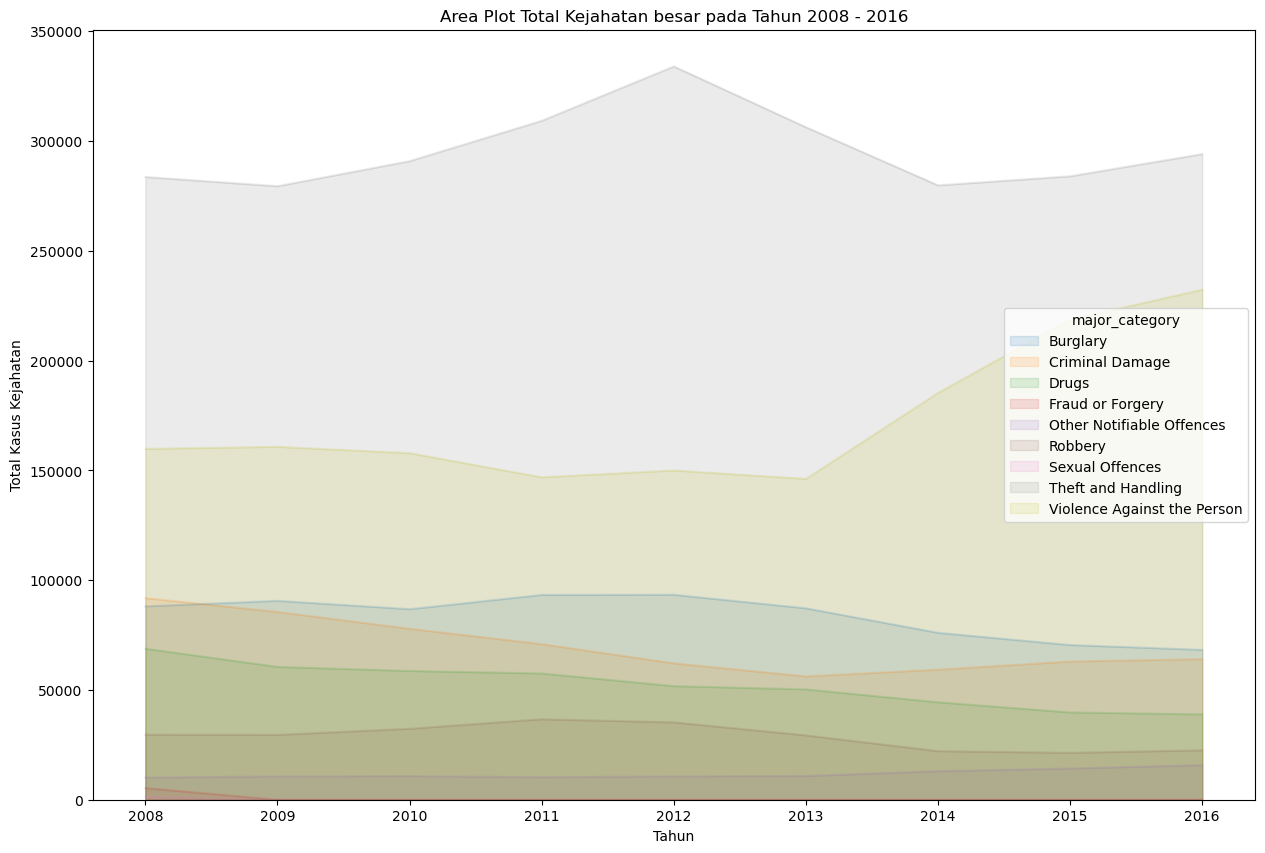

In [81]:
major_crime_by_categories.plot(
            kind = 'area',
            alpha = 0.15,
            stacked = False,
            figsize = (15, 10),
            )

plt.title('Area Plot Total Kejahatan besar pada Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus Kejahatan')
plt.show() 

<b>Insight:</b>
</br>
Kejahatan besar paling banyak terjadi sepanjang tahun 2008 - 2016 adalah theft and handling sebanyak > 300.000 kasus
</br>
Kejahatan besar paling sedikit terjadi sepanjang tahun 2008 -2016 adalah Sexual Offences < 50.000 kasus
</br>
Dan trend pada tahun 2012 terdapat kasus tertinggi untuk kejahatan besar pada kategori Theft and Handling

### Histograms

<b>Soal</b>: Melihat Total kejahatan paling banyak berdasarkan tahun 2008-2016 menggunakan visualisasi Histograms

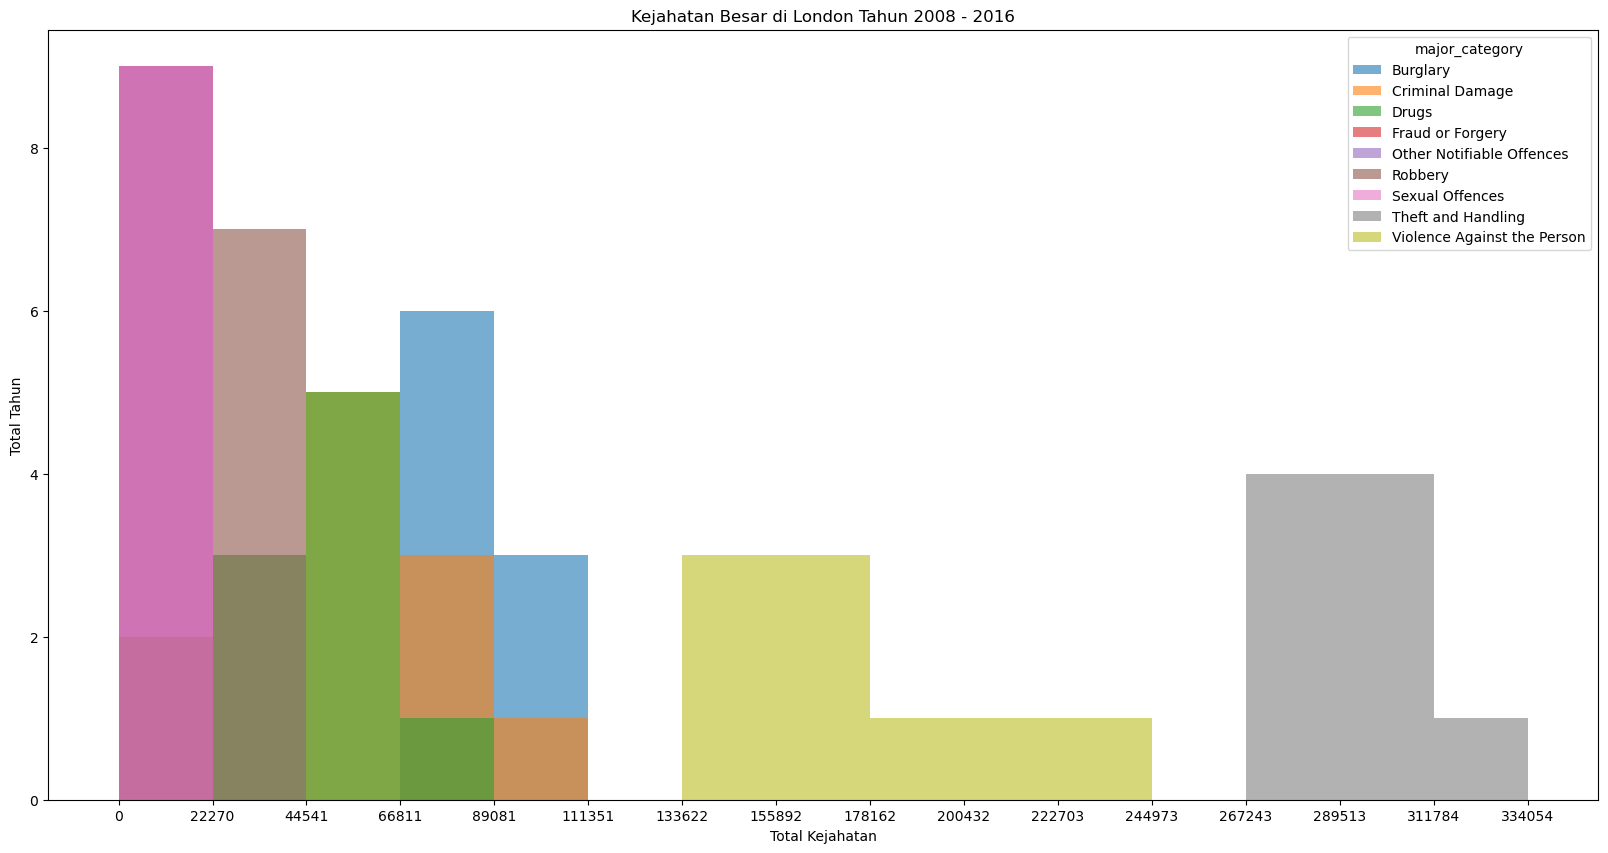

In [65]:
count, bin_edges = np.histogram(major_crime_by_categories, 15)
major_crime_by_categories.plot(kind ='hist',
figsize=(20, 10),
bins=15,
alpha=0.6,
xticks=bin_edges,
)

plt.title('Kejahatan Besar di London Tahun 2008 - 2016') 
plt.ylabel('Total Tahun') 
plt.xlabel('Total Kejahatan')

plt.show()

<b>Insight:</b>
</br>
Kejahatan besar paling banyak terjadi sepanjang tahun 2008 - 2016 adalah theft and handling sebanyak > 334.054 kasus
</br>
Kejahatan besar paling sedikit terjadi sepanjang tahun 2008 - 2016 adalah Sexual Offences < 22.270 kasus

### Bar Charts

<b>Soal</b>: Kasus kejahatan pada kota Merton pada tahun 2008 menggunakan bar chart

In [14]:
df_2008 = df_1[["borough", "major_category", "minor_category","year","month","value"]][df_1.year == 2008]

df_2008

borough               major_category  \
1315511          Tower Hamlets  Violence Against the Person   
2874646              Southwark                      Robbery   
8512166                 Camden              Criminal Damage   
8512169               Hounslow                        Drugs   
5807242   Kingston upon Thames           Theft and Handling   
...                        ...                          ...   
13341039             Southwark              Criminal Damage   
12281116              Hounslow              Criminal Damage   
3249295                Croydon           Theft and Handling   
3432165              Southwark                     Burglary   
856547                 Enfield              Criminal Damage   

                             minor_category  year  month  value  
1315511                      Common Assault  2008      9      2  
2874646                   Business Property  2008      7      1  
8512166               Other Criminal Damage  2008      9      1  
8512169                 Possession Of Drugs  2008      9      2  
5807242                         Other Theft  2008     11      2  
...                                     ...   ...    ...    ...  
13341039              Other Criminal Damage  2008      7      2  
12281116  Criminal Damage To Other Building  2008      2      1  
3249295       Theft/Taking Of Motor Vehicle  2008      6      1  
3432165         Burglary in Other Buildings  2008      1      1  
856547                Other Criminal Damage  2008     11      1  

[391242 rows x 6 columns]

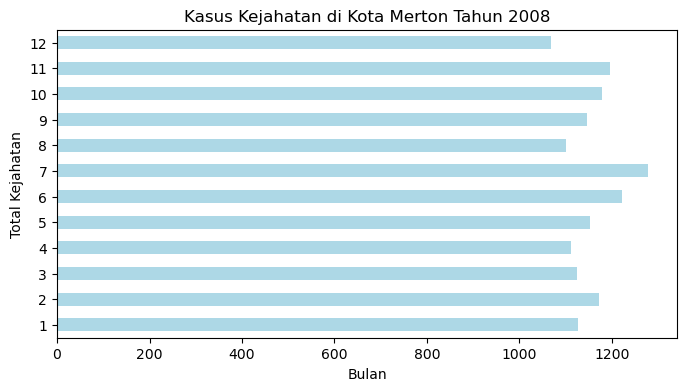

In [73]:
col_borough = df_2008.pivot_table(values = 'value', index = ['month'], columns = ['borough'], aggfunc = np.sum, fill_value = 0)
df_colborough = col_borough['Merton']
df_colborough.plot(kind = 'barh', figsize = (8,4), color = 'lightblue')

plt.xlabel('Bulan')
plt.ylabel('Total Kejahatan')
plt.title('Kasus Kejahatan di Kota Merton Tahun 2008')

plt.show()

<b>Insight:</b>
</br>
Kejahatan paling banyak terjadi di daerah Merton sepanjang tahun 2008 adalah pada bulan 7 dengan sebanyak > 1.200 kasus

### Pie Charts

<b>Soal :</b> Tampilkan persentase kejahatan pada kota London sepanjang tahun 2008 - 2016 dengan menggunakan Pie Chart

In [12]:
total_crimes = df_1['year'].value_counts()
col_years = pd.DataFrame(data= total_crimes.index, columns=["year"])
col_years['values'] = total_crimes.values

In [13]:
fig = px.pie(col_years, values = 'values', names = 'year', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

<b>Insight:</b>
</br>
Kejahatan sepanjang tahun 2008 - 2016 hanya memiliki perbedaan yang tidak terlalu signifikan.
</br>
Kejahatan terendah terjadi pada tahun 2014 dengan total persentase sebanyak 10.5%
</br>
Sedangkan Kejahatan tertinggi terjadi pada tahun 2016 dengan total persentase sebanyak 11.5%

### Box Plots

<Axes: >

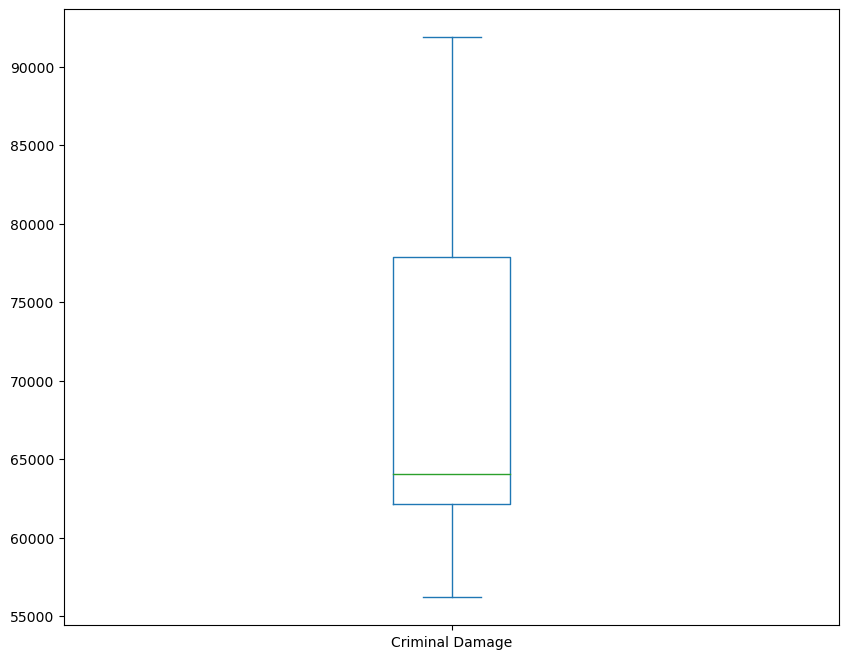

In [17]:
criminal_damage = major_crime_by_categories['Criminal Damage']
criminal_damage.plot(kind='box', figsize=(10, 8))

<b>Insight:</b>
</br>
Kejahatan Criminal Damage sepanjang tahun 2008 - 2016 maksimal dikisaran > 75.000 Kasus.

### Scatter Plots

In [18]:
scatter_plot = major_crime_by_categories[['Criminal Damage','Burglary']]
scatter_plot = scatter_plot.reset_index()
scatter_plot

major_category  year  Criminal Damage  Burglary
0               2008            91872     88092
1               2009            85565     90619
2               2010            77897     86826
3               2011            70914     93315
4               2012            62158     93392
5               2013            56206     87222
6               2014            59279     76053
7               2015            62976     70489
8               2016            64071     68285

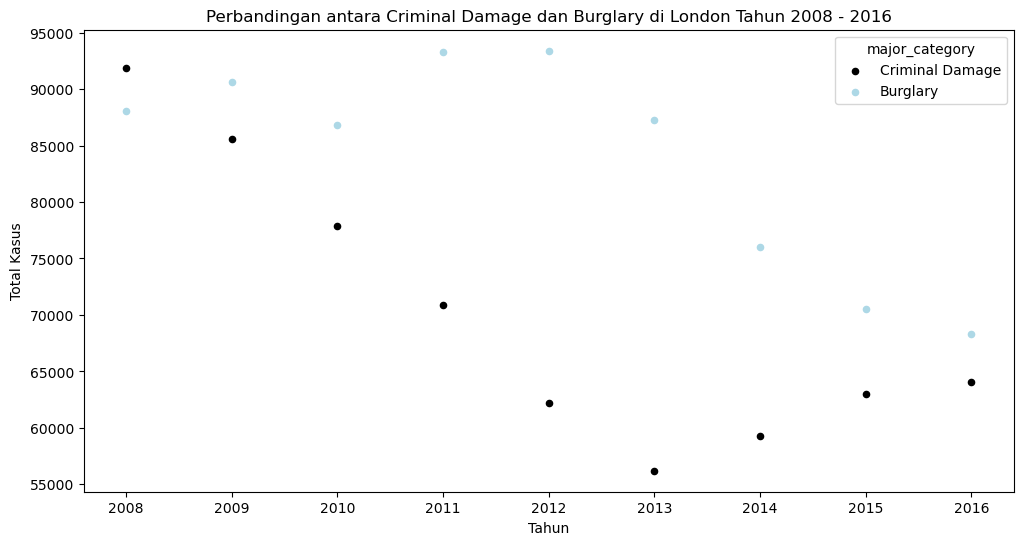

In [19]:
criminal_damage = scatter_plot.plot(kind = 'scatter', x = 'year', y = 'Criminal Damage', figsize = (12, 6), color = 'black', label='Criminal Damage')
burglary = scatter_plot.plot(kind = 'scatter', x = 'year', y = 'Burglary', figsize = (12, 6), color = 'lightblue',label='Burglary', ax = criminal_damage )

plt.title('Perbandingan antara Criminal Damage dan Burglary di London Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

<b>Insight:</b>
</br>
Pada Scatter Plot antara major crime antara Criminal Damage dan Burglary kemungkinan memiliki hubungan, jika burglary mengalami penurunan di tahun berikutnya, Criminal Damage akan sebaliknya mengalami kenaikan dan sebaliknya.

### Word Clouds

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [21]:
major_case = ' '.join(df_1.major_category)

major_wordcloud = WordCloud(
    background_color = 'white',
    max_words = 200,
    stopwords = stopwords
    )

major_wordcloud.generate(major_case)

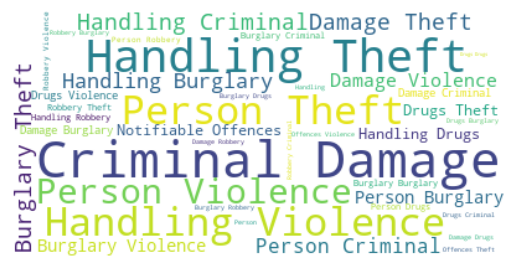

In [22]:
plt.imshow(major_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [26]:
data_major = ' '.join(df_1.major_category)
buckingham_palace = np.array(Image.open('C:/Users/danup/Hacktiv8Project/H8_5/Dataset/buckingham_palace.png'))

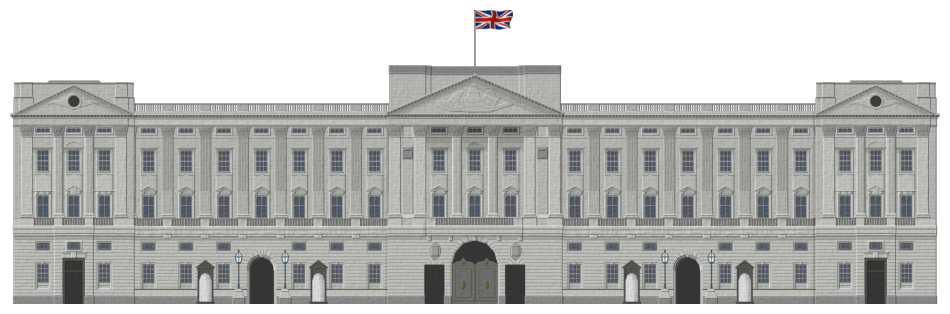

In [27]:
fig=plt.figure()
fig.set_figwidth(12)
fig.set_figheight(14)

plt.imshow(buckingham_palace, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

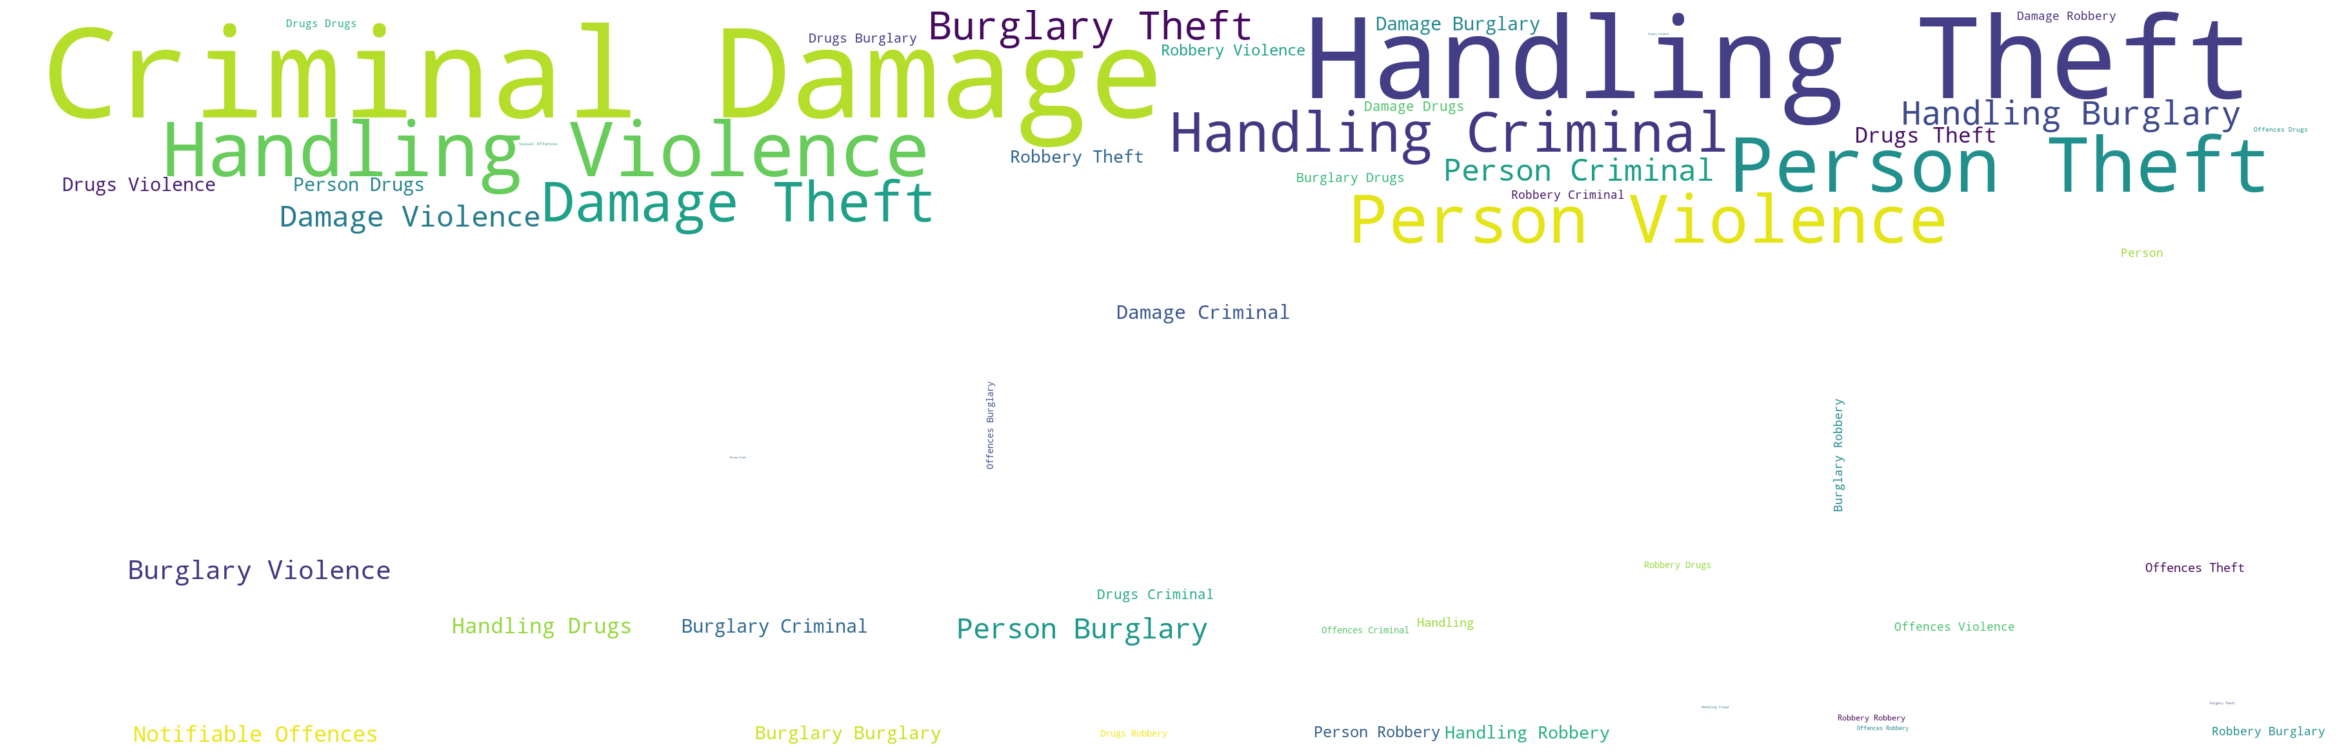

In [30]:
major_wordcloud = WordCloud(
                    background_color = 'white',
                    max_words = 300,
                    mask = buckingham_palace,
                    stopwords = stopwords)
major_wordcloud.generate(data_major)

fig=plt.figure()
fig.set_figwidth(30)
fig.set_figheight(36)

plt.imshow(major_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Folium Map

In [31]:
latitude = 51.509865
longitude = -0.118092

map_of_london = folium.Map(
                    location = [latitude,longitude], 
                    zoom_start = 12)
map_of_london

In [33]:
map_of_london = folium.Map(
                    location = [latitude,longitude],
                    zoom_start = 12, 
                    tiles = "Stamen Terrain")
map_of_london

## Kesimpulan

1 Kejahatan besar paling banyak terjadi sepanjang tahun 2008 - 2016 adalah theft and handling sebanyak > 300.000 kasus
</br>
2 Kejahatan besar paling sedikit terjadi sepanjang tahun 2008 -2016 adalah Sexual Offences < 50.000 kasus
</br>
3 Dan trend pada tahun 2012 terdapat kasus tertinggi untuk kejahatan besar pada kategori Theft and Handling
</br>
4 Kejahatan besar paling banyak terjadi sepanjang tahun 2008 - 2016 adalah theft and handling sebanyak > 334.054 kasus
</br>
5 Kejahatan besar paling sedikit terjadi sepanjang tahun 2008 - 2016 adalah Sexual Offences < 22.270 kasus